<a href="https://colab.research.google.com/github/XYexa/Modern-Portfolio-Theory-in-Python/blob/main/Modern%20Portfolio%20Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Package installation { display-mode: "both" }
!pip install pandas_datareader
!pip install pulp
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 23.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
#pip install pandas_datareader –––-> Para instalar el paquete pandas_datereader.
from pandas_datareader import data
from pulp import *

In [ ]:
import yfinance as yf
# Data import sample
symbol = yf.Ticker("GOOG")
google_data = symbol.history(start="1999-01-01", end="2016-06-30")
google_close = google_data["Close"]
google_close

Date
2004-08-19 00:00:00-04:00     2.499133
2004-08-20 00:00:00-04:00     2.697639
2004-08-23 00:00:00-04:00     2.724787
2004-08-24 00:00:00-04:00     2.611960
2004-08-25 00:00:00-04:00     2.640104
                               ...    
2016-06-23 00:00:00-04:00    35.093498
2016-06-24 00:00:00-04:00    33.761002
2016-06-27 00:00:00-04:00    33.412998
2016-06-28 00:00:00-04:00    34.001999
2016-06-29 00:00:00-04:00    34.205502
Name: Close, Length: 2987, dtype: float64

In [ ]:
from re import S
# Importing data from assets
activos = ["AAPL", "AMXB.MX", "AMZN", "KOFUBL.MX", "DIS", "TSLA", "CEMEXCPO.MX", "BIMBOA.MX"]
df = yf.download(activos, start="2020-10-11", end="2023-10-10")
df= df["Adj Close"]
df.head(5)


[*********************100%%**********************]  8 of 8 completed


,AAPL,AMXB.MX,AMZN,BIMBOA.MX,CEMEXCPO.MX,DIS,KOFUBL.MX,TSLA
Date,,,,,,,,
2020-10-12,122.191353,12.403214,172.146500,38.540165,8.38,124.970001,71.706177,147.433334
2020-10-13,118.949921,12.403214,172.181503,38.682590,8.26,128.960007,70.228096,148.883331
2020-10-14,119.038345,12.484694,168.185501,39.261780,8.47,126.589996,69.848694,153.766663
2020-10-15,118.566849,11.959594,166.932495,39.166836,8.77,127.360001,68.734215,149.626663
2020-10-16,116.906845,11.959594,163.635498,39.109863,8.69,126.809998,68.473373,146.556671


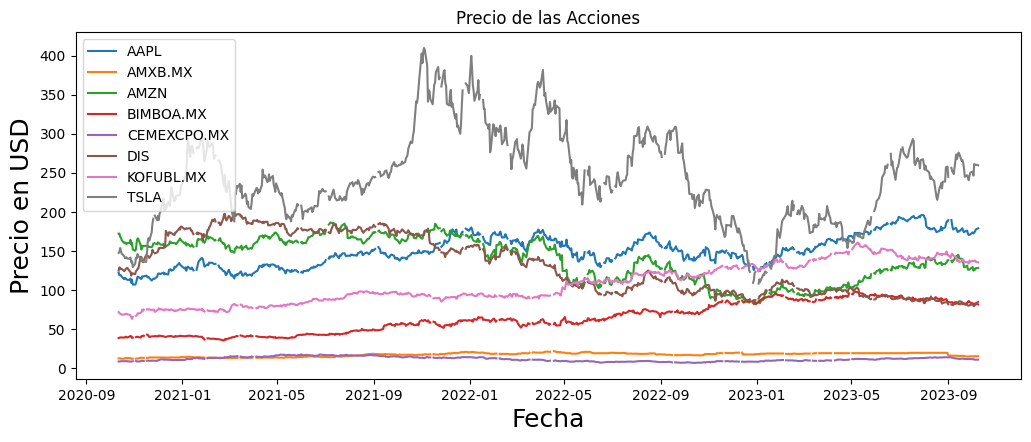

In [ ]:
# Action close price plot
plt.figure(figsize=(12.2,4.5))
for i in df.columns.values:
    plt.plot( df[i],  label=i)
plt.title('Precio de las Acciones')
plt.xlabel('Fecha',fontsize=18)
plt.ylabel('Precio en USD',fontsize=18)
plt.legend(df.columns.values, loc='upper left')
plt.savefig('plotprecios.png', dpi=300, bbox_inches='tight')
plt.show()

# Logaritmic returns


In [ ]:
df = np.log(df).diff()
df_log = df.dropna()
df_log

,AAPL,AMXB.MX,AMZN,BIMBOA.MX,CEMEXCPO.MX,DIS,KOFUBL.MX,TSLA
Date,,,,,,,,
2020-10-13,-0.026886,0.000000,0.000203,0.003689,-0.014423,0.031429,-0.020828,0.009787
2020-10-14,0.000743,0.006548,-0.023482,0.014862,0.025106,-0.018549,-0.005417,0.032273
2020-10-15,-0.003969,-0.042970,-0.007478,-0.002421,0.034806,0.006064,-0.016084,-0.027293
2020-10-16,-0.014100,0.000000,-0.019948,-0.001456,-0.009164,-0.004328,-0.003802,-0.020731
2020-10-19,-0.025874,0.000000,-0.020217,0.000000,0.000000,-0.020555,0.000000,-0.020311
...,...,...,...,...,...,...,...,...
2023-10-03,-0.007800,-0.020176,-0.037301,-0.013343,-0.033811,-0.026427,-0.003208,-0.020357
2023-10-04,0.007282,0.031430,0.018116,-0.007477,0.019714,-0.002770,-0.001169,0.057650
2023-10-05,0.007172,0.006562,-0.008223,0.018649,-0.053772,0.018610,0.007865,-0.004259


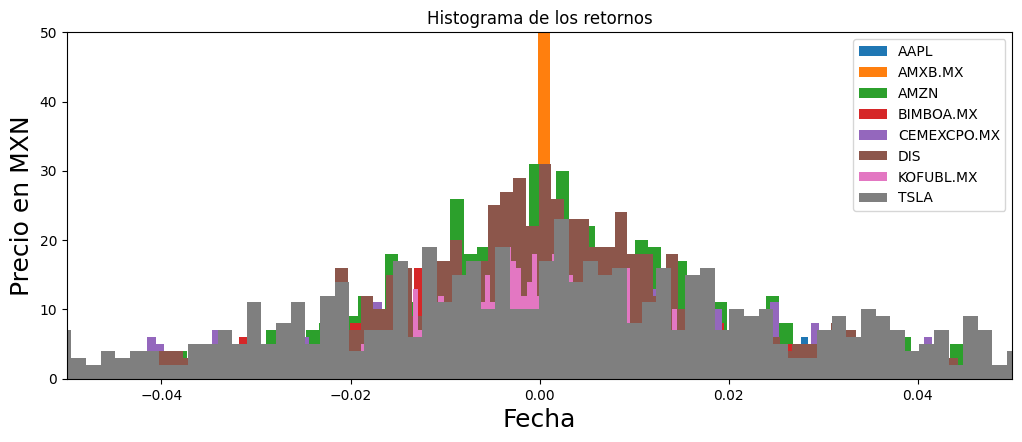

In [ ]:
# Return histogram
# Normality distribution of data
plt.figure(figsize=(12.2,4.5))
for i in df.columns.values:
    plt.hist( df_log[i],  label=i, bins = 200)
plt.title('Histograma de los retornos')
plt.xlabel('Fecha',fontsize=18)
plt.ylabel('Precio en MXN',fontsize=18)
plt.legend(df_log.columns.values)
plt.xlim((-.05,.05))
plt.ylim((0,50))
plt.savefig('plotretornosnormales.png', dpi=300, bbox_inches='tight')
plt.show()

### General risk measurements:

Mean

Std

Var

In [ ]:
Expected_return= (df_log.mean())*100
Expected_return

AAPL           0.054448
AMXB.MX        0.033737
AMZN          -0.059585
BIMBOA.MX      0.096252
CEMEXCPO.MX    0.050978
DIS           -0.047335
KOFUBL.MX      0.086851
TSLA           0.043977
dtype: float64

In [ ]:
Expected_net_risk= (df_log.var())*100
Expected_net_risk

AAPL           0.033251
AMXB.MX        0.028036
AMZN           0.057593
BIMBOA.MX      0.037300
CEMEXCPO.MX    0.060713
DIS            0.041423
KOFUBL.MX      0.018150
TSLA           0.137644
dtype: float64

In [ ]:
Expected_risk= (df_log.std())*100
Expected_risk

AAPL           1.823485
AMXB.MX        1.674397
AMZN           2.399846
BIMBOA.MX      1.931330
CEMEXCPO.MX    2.463993
DIS            2.035267
KOFUBL.MX      1.347208
TSLA           3.710036
dtype: float64

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


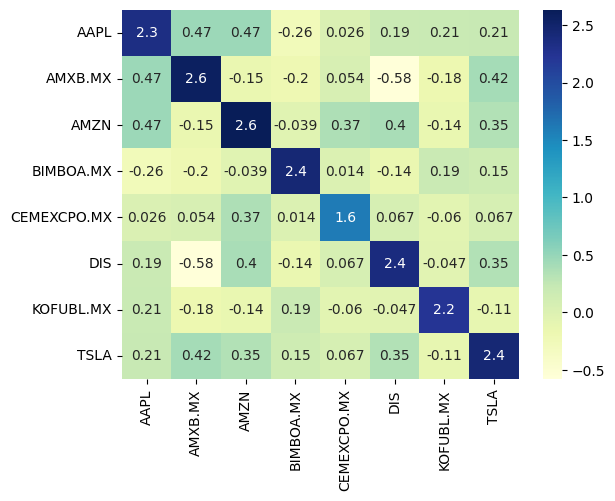

In [ ]:
# @title Covariance
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix
covplot = sns.heatmap(cov_matrix, cmap="YlGnBu", annot=True)
# displaying heatmap
plt.show()

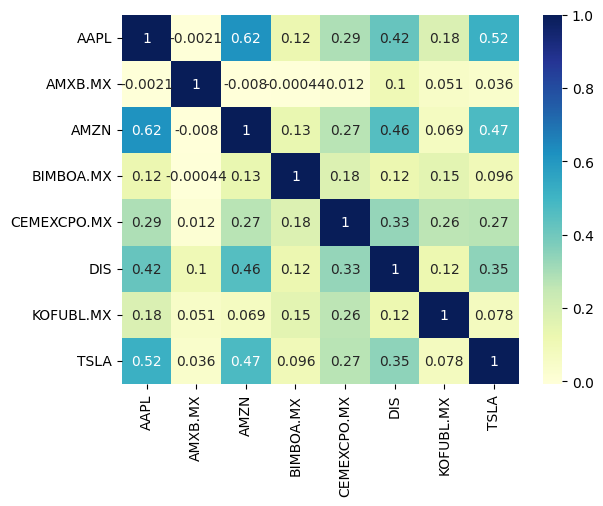

In [ ]:
df_corr= df.pct_change().apply(lambda x: np.log(1+x)).corr()
# plotting correlation heatmap
dataplot = sns.heatmap(df_log.corr(), cmap="YlGnBu", annot=True)
# displaying heatmap
plt.show()

In [ ]:
# NUMBER OF OBSERVATIONS
n_obs= df.shape[0]  # Gives number of rows
n_assets = df.shape[1]  # Gives number of columns

return_vec = np.random.randn(n_assets, n_obs)
n_obs

#Varianza, devest, asignaci[on de activos

776

In [ ]:
# Randomly weighted portfolio's variance
w = {'AAPL': 0.1,
     'AMXB.MX': 0.1,
     'GOOGL': 0.1,
     'AMZN': 0.1,
     'KOFUBL.MX': 0.1,
     'CEMEXCPO.MX': 0.1,
     'BIMBOA.MX': 0.1,
     'DIS': 0.3}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.35985462050198014

# Portfolio Expected returns


In [ ]:
# Yearly returns for individual companies

def ind_er(df):
    df = df.resample('Y').last()
    df.replace(0, 0.001, inplace=True)
    return df.pct_change().mean()

print(ind_er(df.copy()))

AAPL            0.058212
AMXB.MX         2.094122
AMZN           -0.869145
BIMBOA.MX     -15.896705
CEMEXCPO.MX     1.998848
DIS           -43.294848
KOFUBL.MX      -5.314015
TSLA           -1.662793
dtype: float64


In [ ]:
#Portfolio expected returns
w = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.3]
port_er = (w*ind_er(df)).sum()
#port_er = sum([w[i] * ind_er(df) for i in range(len(w))])
print(port_er)

-6.621191029942152


# Plotting the efficient frontier


Shows the maximum return we can get for a set of volatility, or the volatility wee need to get a level of returns
*   Y-axis: Graph with returns
*   X-axis: Volatility


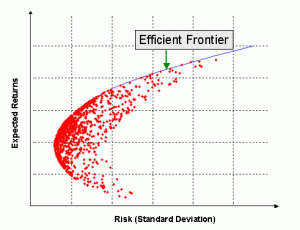



In [ ]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
# We replaced cero values with a loop to calculate volatility eith the minimum value found in the dataframe

def ann_sd(df):
    df.replace(0, 0.001, inplace=True)
    return df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))

ann_sd(df)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


AAPL           24.296099
AMXB.MX        24.493984
AMZN           25.657409
BIMBOA.MX      25.057585
CEMEXCPO.MX    21.005374
DIS            24.413712
KOFUBL.MX      23.572690
TSLA           24.840689
dtype: float64

In [ ]:
#Amazon has the highest risk, given as volatility
assets = pd.concat([ind_er(df), ann_sd(df)], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Returns,Volatility
AAPL,0.058212,24.296099
AMXB.MX,2.094122,24.493984
AMZN,-0.869145,25.657409
BIMBOA.MX,-15.896705,25.057585
CEMEXCPO.MX,1.998848,21.005374
DIS,-43.294848,24.413712
KOFUBL.MX,-5.314015,23.572690
TSLA,-1.662793,24.840689


In [ ]:
#We run a loop which will consider random weights a 1000 times to determine the optimal portfolio wight
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [ ]:
for portfolio in range(num_portfolios):
# To get random numbers for weights, we use the np.random.random()
    weights = np.random.random(num_assets)
# Remember that the sum of weights must be 1, so we divide those weights by their cumulative sum.
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er(df)) # Returns are the product of individual expected returns of asset and its
                                      # weights
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [ ]:
import statistics as st
data = {'Returns':p_ret, 'Volatility':p_vol}
for counter, symbol in enumerate(df.columns.tolist()):
 data[symbol+' weight'] = [w[counter] for w in p_weights]

if len(p_ret) != len(p_vol):
    # Append mean values to the list with smaller length
    if len(p_vol) > len(p_ret):
        mean_width = st.mean(p_vol)
        p_vol += (len(p_vol)-len(p_ret)) * [mean_width]
    elif len(p_ret) < len(p_vol):
        mean_length = st.mean(p_ret)
        p_vol += (len(p_ret)-len(p_vol)) * [mean_length]

portfolios  = pd.DataFrame(data)

portfolios.head()

,Returns,Volatility,AAPL weight,AMXB.MX weight,AMZN weight,BIMBOA.MX weight,CEMEXCPO.MX weight,DIS weight,KOFUBL.MX weight,TSLA weight
0,-11.663498,10.787099,0.053925,0.255767,0.070024,0.026552,0.088781,0.258094,0.085492,0.161365
1,-7.958162,10.532493,0.037253,0.282536,0.136710,0.156006,0.016640,0.119992,0.102511,0.148352
2,-8.453824,11.045401,0.216917,0.244015,0.049224,0.058717,0.012008,0.155499,0.234064,0.029556
3,-9.638867,9.944855,0.025851,0.172940,0.089368,0.261196,0.115114,0.123433,0.083837,0.128261
4,-11.745846,12.508209,0.236676,0.040111,0.238353,0.008210,0.052380,0.247205,0.168036,0.009029


In [ ]:
import statistics as st
if len(p_ret) != len(p_vol):
    # Append mean values to the list with smaller length
    if len(p_vol) > len(p_ret):
        mean_width = st.mean(p_vol)
        p_vol += (len(p_vol)-len(p_ret)) * [mean_width]
    elif len(p_ret) < len(p_vol):
        mean_length = st.mean(p_ret)
        p_vol += (len(p_ret)-len(p_vol)) * [mean_length]

In [ ]:
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,AAPL weight,AMXB.MX weight,AMZN weight,BIMBOA.MX weight,CEMEXCPO.MX weight,DIS weight,KOFUBL.MX weight,TSLA weight
0,-11.663498,10.787099,0.053925,0.255767,0.070024,0.026552,0.088781,0.258094,0.085492,0.161365
1,-7.958162,10.532493,0.037253,0.282536,0.136710,0.156006,0.016640,0.119992,0.102511,0.148352
2,-8.453824,11.045401,0.216917,0.244015,0.049224,0.058717,0.012008,0.155499,0.234064,0.029556
3,-9.638867,9.944855,0.025851,0.172940,0.089368,0.261196,0.115114,0.123433,0.083837,0.128261
4,-11.745846,12.508209,0.236676,0.040111,0.238353,0.008210,0.052380,0.247205,0.168036,0.009029


<Axes: xlabel='Volatility', ylabel='Returns'>

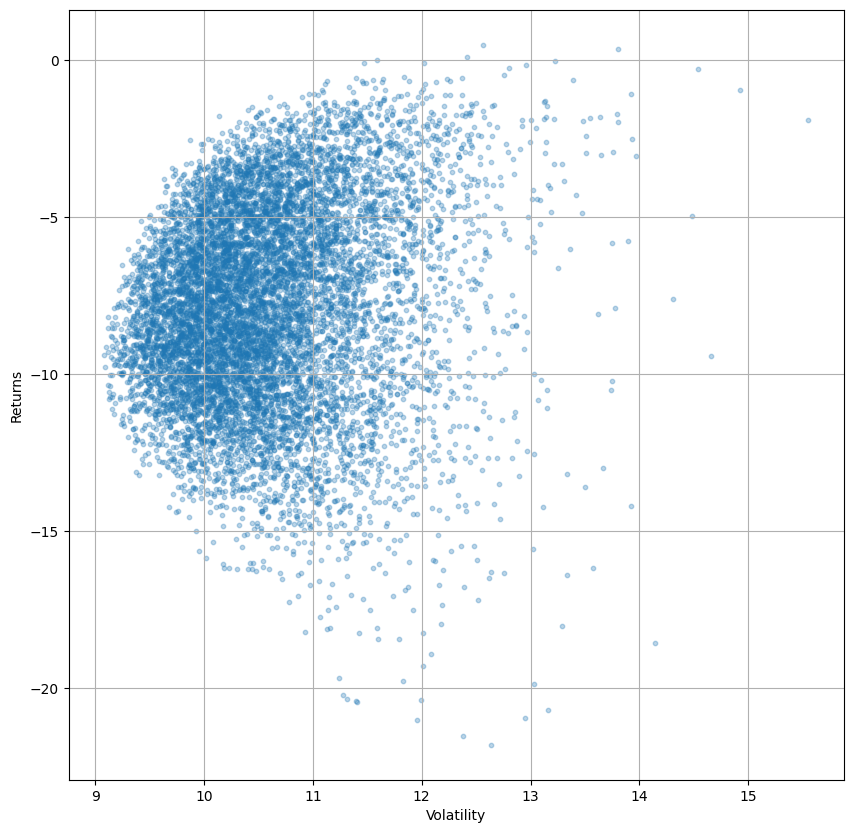

In [ ]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

# Minimum volatility portfolio

In [ ]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.
min_vol_port

Returns              -9.395334
Volatility            9.077708
AAPL weight           0.092628
AMXB.MX weight        0.151469
AMZN weight           0.033751
BIMBOA.MX weight      0.131828
CEMEXCPO.MX weight    0.195720
DIS weight            0.161811
KOFUBL.MX weight      0.162004
TSLA weight           0.070788
Name: 2633, dtype: float64

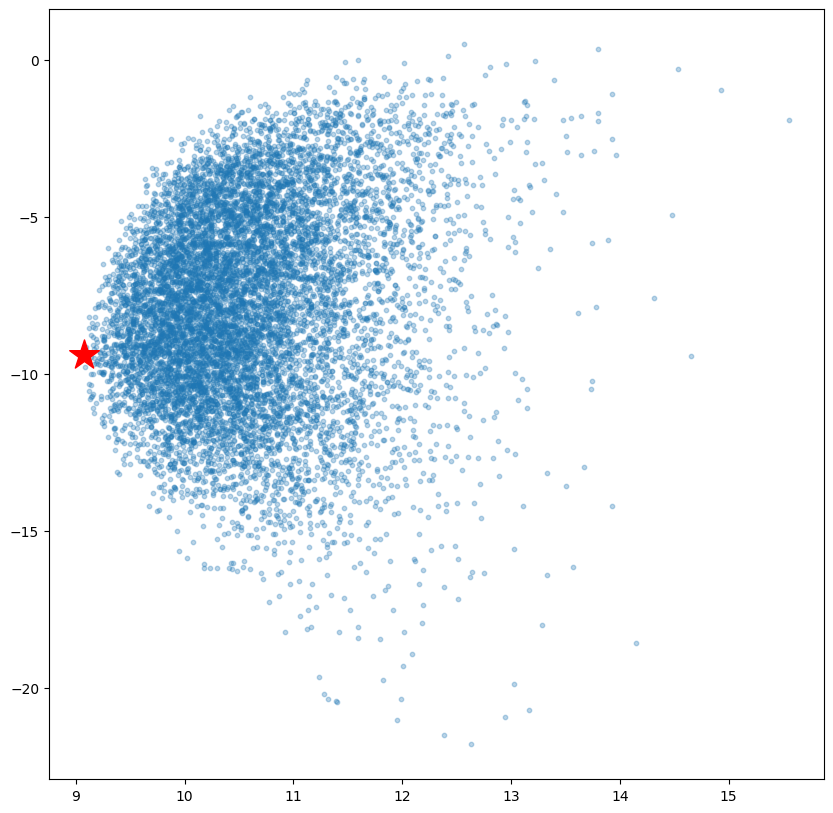

In [ ]:
# plotting the minimum volatility portfolio
#The red star denotes the most efficient portfolio with minimum volatility.
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

# Sharpe Ratio

Average return earned in excess of the risk-free rate per unit of volatility or total risk.
Optimal risky portfolio: the one that has the **highest** shape ratio.

**Formula:**


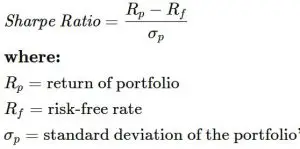



# Optimal Portfolio

In [ ]:
# Finding the optimal portfolio
# We define the risk-free rate to be 1% or 0.01.
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns                0.494343
Volatility            12.566837
AAPL weight            0.147639
AMXB.MX weight         0.231006
AMZN weight            0.221011
BIMBOA.MX weight       0.002002
CEMEXCPO.MX weight     0.318565
DIS weight             0.006224
KOFUBL.MX weight       0.005230
TSLA weight            0.068322
Name: 2268, dtype: float64

> ***IDEAL PORTFOLIO***


---




**Returns                49.43 %**

**Volatility            12.566837**

**Weights:**

AAPL:            14.76 %

AMXB.MX:          23.10 %

AMZN:            22.10 %

BIMBOA.MX:       .2 %

CEMEXCPO.MX:     31.85 %

DIS:             .6 %

KOFUBL.MX:        .5 %

TSLA:           6.83 %

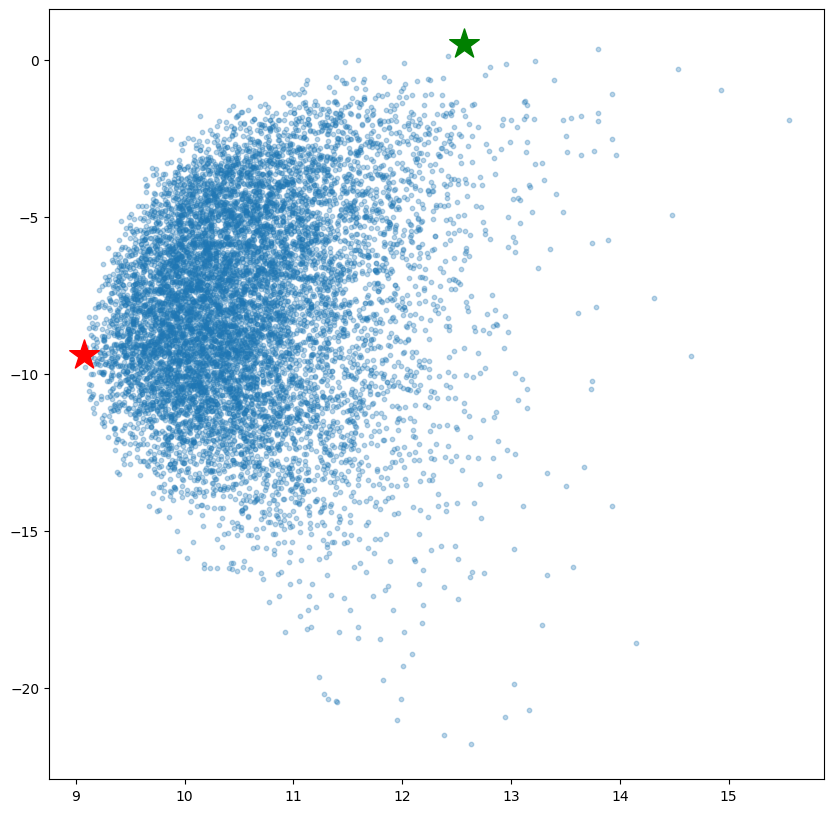

In [ ]:
# Plotting optimal portfolio
# The green star represents the optimal risky portfolio.
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)